<a href="https://colab.research.google.com/github/Sahith-Rao/IIIT_internship/blob/main/ML_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahithrao22","key":"3e8d435c41252563c4c35bfc941c6916"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d adhamelkomy/bank-customer-complaint-analysis

Dataset URL: https://www.kaggle.com/datasets/adhamelkomy/bank-customer-complaint-analysis
License(s): CC0-1.0
  0% 0.00/20.0M [00:00<?, ?B/s]
100% 20.0M/20.0M [00:00<00:00, 1.25GB/s]


In [5]:
!unzip bank-customer-complaint-analysis.zip

Archive:  bank-customer-complaint-analysis.zip
  inflating: Bank Customer Complaint Analysis for Efficient Dispute Resolution.ipynb  
  inflating: complaints.csv          
  inflating: complaints_report_20240226_183305.txt  
  inflating: final_dataframe (1).csv  


In [6]:
df = pd.read_csv("complaints.csv")
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [7]:
df.rename(columns={'Unnamed: 0': 'Complaint_No'}, inplace=True)

In [8]:
df.head()

,Complaint_No,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [9]:
unique=df["product"].unique()
unique

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

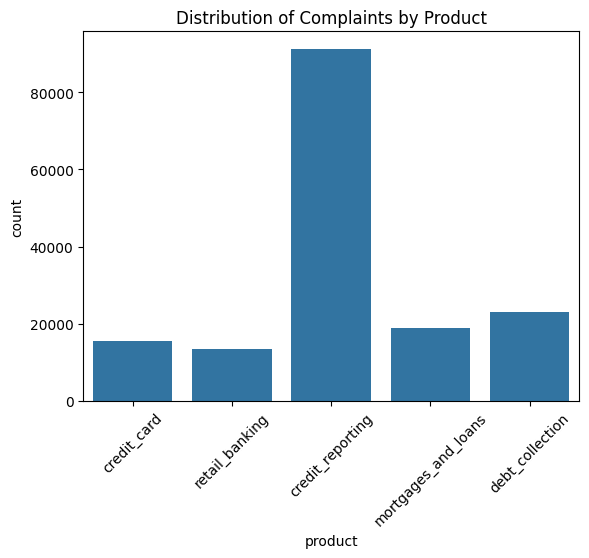

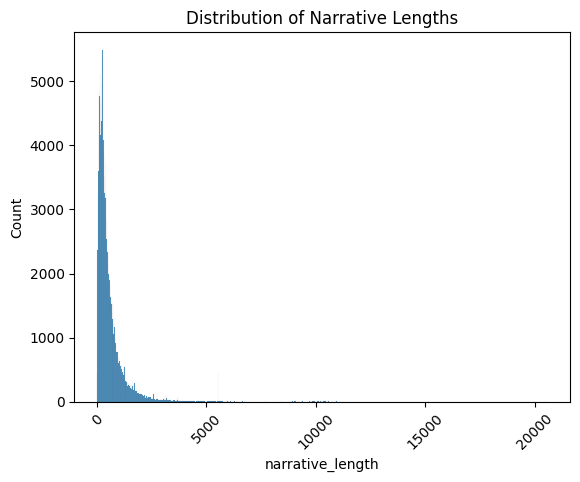

In [10]:
sns.countplot(x='product', data=df)
plt.title('Distribution of Complaints by Product')
plt.xticks(rotation=45)
plt.show()

df['narrative_length'] = df['narrative'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
sns.histplot(df['narrative_length'])
plt.title('Distribution of Narrative Lengths')
plt.xticks(rotation=45)
plt.show()

In [11]:
df["product"] = df["product"].replace({
    "credit_card": "1",
    "retail_banking": "2",
    "credit_reporting": "3",
    "mortgages_and_loans": "4",
    "debt_collection": "5"
}, regex=False)

df.head()

,Complaint_No,product,narrative,narrative_length
0,0,1,purchase order day shipping amount receive pro...,1705
1,1,1,forwarded message date tue subject please inve...,904
2,2,2,forwarded message cc sent friday pdt subject f...,1230
3,3,3,payment history missing credit report speciali...,903
4,4,3,payment history missing credit report made mis...,851


In [12]:
df = df.drop("narrative_length", axis = 1)
df

,Complaint_No,product,narrative
0,0,1,purchase order day shipping amount receive pro...
1,1,1,forwarded message date tue subject please inve...
2,2,2,forwarded message cc sent friday pdt subject f...
3,3,3,payment history missing credit report speciali...
4,4,3,payment history missing credit report made mis...
...,...,...,...
162416,162416,5,name
162417,162417,1,name
162418,162418,5,name
162419,162419,1,name


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Complaint_No  162421 non-null  int64 
 1   product       162421 non-null  object
 2   narrative     162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [16]:
df.isnull().sum()

,0
Complaint_No,0
product,0
narrative,10


In [17]:
df=df.dropna()

In [18]:
df.duplicated().sum()

np.int64(0)

1.Lowercasing


In [19]:
df["narrative"]=df["narrative"].str.lower()
df.head()

,Complaint_No,product,narrative
0,0,1,purchase order day shipping amount receive pro...
1,1,1,forwarded message date tue subject please inve...
2,2,2,forwarded message cc sent friday pdt subject f...
3,3,3,payment history missing credit report speciali...
4,4,3,payment history missing credit report made mis...


2.Punctuation removal


In [20]:
punc=string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))

df["narrative"]=df["narrative"].apply(remove_punc)
df.head()

,Complaint_No,product,narrative
0,0,1,purchase order day shipping amount receive pro...
1,1,1,forwarded message date tue subject please inve...
2,2,2,forwarded message cc sent friday pdt subject f...
3,3,3,payment history missing credit report speciali...
4,4,3,payment history missing credit report made mis...


3.Stopwords removal

In [21]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [22]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)
df["narrative"]=df["narrative"].apply(lambda x: remove_stopwords(x))

df.head()

,Complaint_No,product,narrative
0,0,1,purchase order day shipping amount receive pro...
1,1,1,forwarded message date tue subject please inve...
2,2,2,forwarded message cc sent friday pdt subject f...
3,3,3,payment history missing credit report speciali...
4,4,3,payment history missing credit report made mis...


4.Tokenize

In [23]:
X = df['narrative'].values

In [24]:
X

array(['purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing 

In [25]:
y = df["product"]
y

,product
0,1
1,1
2,2
3,3
4,3
...,...
162416,5
162417,1
162418,5
162419,1


In [26]:
y.shape

(162411,)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((129928,), (129928,), (32483,), (32483,))

In [29]:
import numpy as np
from scipy.sparse import lil_matrix

class BoWVectorizer:
    def __init__(self):
        self.vocabulary = {}
        self.num_sentences = 0

    def set_params(self, **kwargs):
        for parameter, value in kwargs.items():
            setattr(self, parameter, value)
        return self

    def fit(self, sentences,y=None):
        """
        Fit the BoW model on the input documents.

        Parameters:
        - sentences (list): List of input documents (strings)

        Returns:
        - self
        """

        for sent in sentences:
            for word in sent.split():
                if word not in self.vocabulary:
                    self.vocabulary[word] = len(self.vocabulary)
        self.num_sentences = len(sentences)
        return self

    def transform(self, sentences):

        """
        The method body initializes a sparse BoW matrix using lil_matrix from the scipy.sparse module.
        The size of the matrix is determined by the number of input sentences (len(sentences)) and the vocabulary size (len(self.vocabulary)).
        """


        bow_matrix = lil_matrix((len(sentences), len(self.vocabulary)), dtype=np.int32)
        """
        It then iterates over each sentence in the input sentences list using the enumerate function, which provides both the index (i) and the value (document) of each sentence.
        Within the loop, another loop iterates over each word in the current sentence using document.split(), which splits the sentence into individual words based on whitespace.
        For each word, it checks if it is present in the vocabulary (self.vocabulary). If the word is in the vocabulary, it retrieves its index from the vocabulary dictionary (self.vocabulary[word]).
        It then updates the corresponding entry in the BoW matrix by incrementing the count of that word in the current document (bow_matrix[i, word_index] += 1).
        """
        for i, sent in enumerate(sentences):
            for word in sent.split():
                if word in self.vocabulary:
                    word_index = self.vocabulary[word]
                    bow_matrix[i, word_index] += 1

        return bow_matrix


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

bow_vectorizer = BoWVectorizer()


naive_bayes = MultinomialNB(alpha=1.5)

pipeline_NB = Pipeline([
    ('bow', bow_vectorizer),
    ('classifier', naive_bayes)
])

pipeline_NB.fit(X_train, y_train)

predictions = pipeline_NB.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.821722131576517


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

bow_vectorizer = BoWVectorizer()

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

pipeline_knn = Pipeline([
    ('bow', bow_vectorizer),
    ('classifier', knn)
])

pipeline_knn.fit(X_train, y_train)

predictions = pipeline_knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7797001508481359


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

bow_vectorizer = BoWVectorizer()


LR = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs')
pipeline_LR = Pipeline([
    ('bow', bow_vectorizer),
    ('classifier', LR)
])

pipeline_LR.fit(X_train, y_train)

predictions = pipeline_LR.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.857463904196041


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bow_vectorizer = BoWVectorizer()


dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='gini')

pipeline_dt = Pipeline([
    ('bow', bow_vectorizer),
    ('classifier', dt)
])

pipeline_dt.fit(X_train, y_train)

predictions = pipeline_dt.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.823938675614937


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

bow_vectorizer = BoWVectorizer()


rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='gini')

pipeline_rf = Pipeline([
    ('bow', bow_vectorizer),
    ('classifier', rf)
])

pipeline_rf.fit(X_train, y_train)

predictions = pipeline_rf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8737801311455222


In [38]:
models = [pipeline_NB, pipeline_knn, pipeline_LR, pipeline_dt,pipeline_rf]
ModelsNames = ["Naive Bayes Classifier","KNN Classifier","Logistic Regression", "Decision Tree", "Random Forest"]

test_sample = X_test[1]

def predict(test_sample, models):
    test_sample = np.expand_dims(test_sample, axis=0)
    for i, model in enumerate(models):
        print(f"Model {ModelsNames[i]}: Predicted class is {classesDic[model.predict(test_sample)[0]]}")

predict(test_sample, models)

Model Naive Bayes Classifier: Predicted class is credit_reporting
Model KNN Classifier: Predicted class is credit_reporting
Model Logistic Regression: Predicted class is credit_reporting
Model Decision Tree: Predicted class is credit_reporting
Model Random Forest: Predicted class is credit_reporting


Model Naive Bayes Classifier Accuracy: 0.821722131576517
Model KNN Classifier Accuracy: 0.7797001508481359
Model Logistic Regression Accuracy: 0.857463904196041
Model Decision Tree Accuracy: 0.823938675614937
Model Random Forest Accuracy: 0.8737801311455222
Best Model : Random Forest


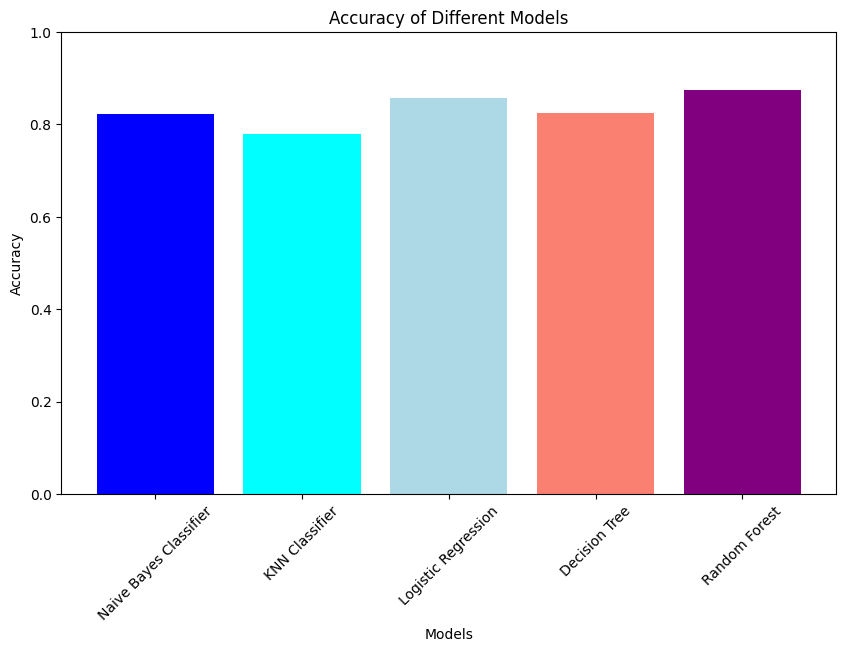

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def plot_model_accuracies(models, models_names, accuracies):
    plt.figure(figsize=(10, 6))
    plt.bar(models_names, accuracies, color=['blue', 'cyan', 'lightblue', 'salmon', 'purple'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of Different Models')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

accuracies = []

def compare_models(models, test_sample, test_label):
    for i, model in enumerate(models):
        predictions = model.predict(test_sample)
        accuracy = accuracy_score(test_label, predictions)
        accuracies.append(accuracy)
        print(f"Model {ModelsNames[i]} Accuracy: {accuracy}")

    best_model_index = accuracies.index(max(accuracies))
    print(f"Best Model : {ModelsNames[best_model_index]}")

compare_models(models, X_test, y_test)
plot_model_accuracies(models, ModelsNames, accuracies)